In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [9]:
#selected subset of dates. 
val_dates = ['180409','180412','180414']
test_dates = ['180411', '180413']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/'
model_saving_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models'
CH = 23

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256,CH = CH)

In [10]:
ls /home/bijanadmin/Desktop/Goose_data/

data_Goose_1st_15s_1/  data_Goose_1st_5s_1/   data_Goose_all_2/     model/
data_Goose_1st_15s_2/  data_Goose_1st_5s_2/   data_Goose_all_5s_2/
data_Goose_1st_2/      data_Goose_all_15s_2/  figures/


In [11]:
len(train_loader), len(val_loader), len(test_loader)

(173, 26, 24)

In [12]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 1, 100, 10])
torch.Size([256, 1])
256
256
256


date:180324, rec:003, time:2982.0, label:0.0


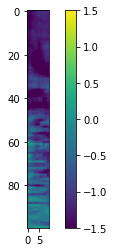

date:180327, rec:008, time:2312.0, label:0.0


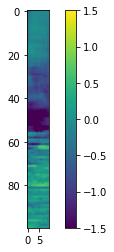

date:180401, rec:003, time:80.0, label:1.0
date:180324, rec:008, time:5804.0, label:0.0


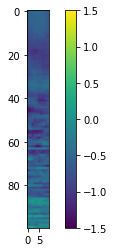

date:180331, rec:007, time:3407.0, label:0.0


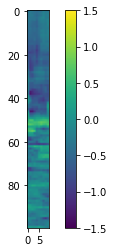

date:180330, rec:008, time:4677.0, label:0.0


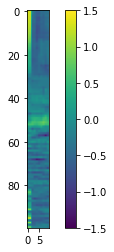

date:180331, rec:007, time:3337.0, label:0.0


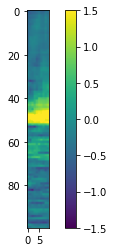

date:180327, rec:002, time:4143.0, label:1.0
date:180323, rec:002, time:1967.0, label:1.0
date:180329, rec:001, time:1070.0, label:0.0


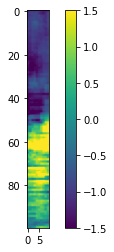

date:180327, rec:004, time:2584.0, label:0.0


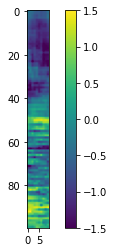

date:180325, rec:009, time:1140.0, label:0.0


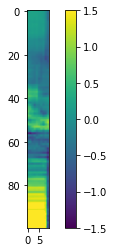

date:180329, rec:001, time:1360.0, label:0.0


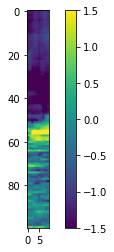

date:180322, rec:007, time:2113.0, label:0.0


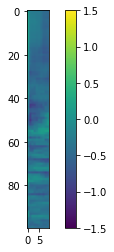

date:180324, rec:008, time:3970.0, label:1.0
date:180410, rec:004, time:6442.0, label:1.0
date:180324, rec:003, time:3687.0, label:1.0
date:180324, rec:006, time:1022.0, label:1.0
date:180322, rec:005, time:2085.0, label:1.0
date:180322, rec:007, time:4540.0, label:0.0


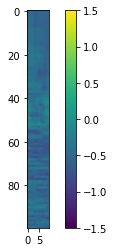

date:180330, rec:009, time:4921.0, label:0.0


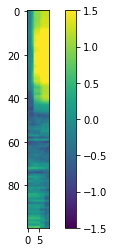

date:180331, rec:007, time:412.0, label:0.0


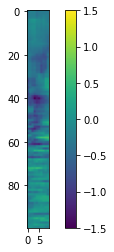

date:180330, rec:009, time:2144.0, label:0.0


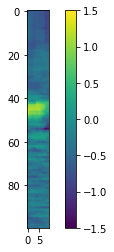

date:180331, rec:001, time:1480.0, label:0.0


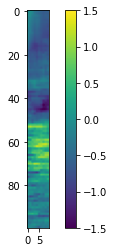

date:180330, rec:008, time:6075.0, label:0.0


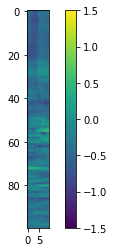

date:180327, rec:008, time:280.0, label:0.0


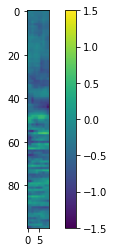

date:180322, rec:002, time:4999.0, label:1.0
date:180330, rec:009, time:1634.0, label:0.0


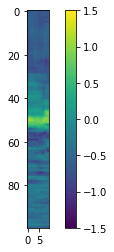

date:180401, rec:001, time:5177.0, label:0.0


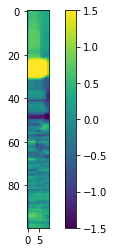

date:180331, rec:001, time:2759.0, label:0.0


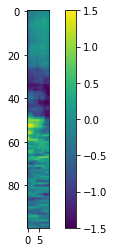

date:180330, rec:004, time:3746.0, label:1.0
date:180323, rec:007, time:2895.0, label:0.0


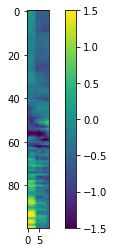

date:180330, rec:009, time:2114.0, label:0.0


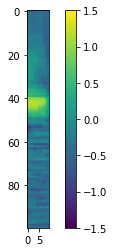

date:180330, rec:008, time:3076.0, label:0.0


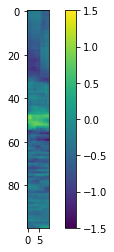

date:180325, rec:007, time:1344.0, label:1.0
date:180325, rec:009, time:1560.0, label:0.0


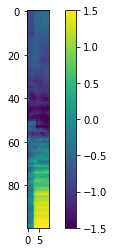

date:180401, rec:001, time:6233.0, label:1.0
date:180325, rec:007, time:170.0, label:1.0
date:180330, rec:001, time:3322.0, label:1.0
date:180330, rec:008, time:3236.0, label:0.0


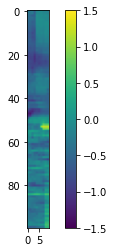

date:180330, rec:004, time:3496.0, label:1.0
date:180410, rec:004, time:5159.0, label:1.0
date:180325, rec:009, time:4459.0, label:0.0


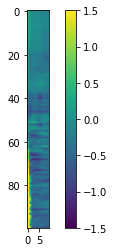

date:180324, rec:009, time:500.0, label:0.0


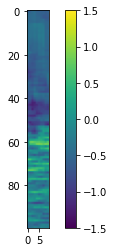

date:180331, rec:007, time:2317.0, label:0.0


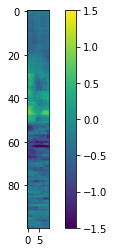

date:180401, rec:001, time:2479.0, label:1.0
date:180330, rec:008, time:1681.0, label:0.0


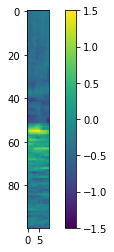

date:180329, rec:002, time:1970.0, label:1.0
date:180325, rec:002, time:3457.0, label:1.0
date:180327, rec:007, time:5951.0, label:0.0


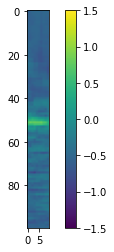

date:180325, rec:007, time:6233.0, label:0.0


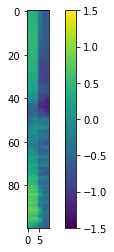

date:180330, rec:001, time:6105.0, label:1.0
date:180330, rec:009, time:1494.0, label:0.0


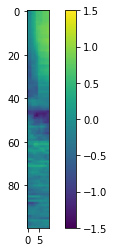

date:180410, rec:006, time:6800.0, label:0.0


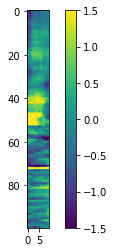

date:180331, rec:005, time:3237.0, label:1.0
date:180327, rec:002, time:2630.0, label:1.0
date:180410, rec:002, time:3989.0, label:1.0
date:180327, rec:007, time:4160.0, label:0.0


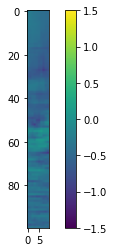

date:180325, rec:006, time:4945.0, label:1.0
date:180323, rec:005, time:2917.0, label:1.0
date:180327, rec:006, time:840.0, label:1.0
date:180410, rec:005, time:987.0, label:1.0
date:180327, rec:008, time:3282.0, label:0.0


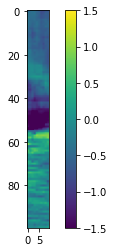

date:180323, rec:007, time:7161.0, label:0.0


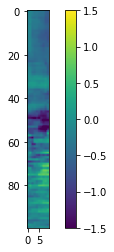

date:180324, rec:008, time:2588.0, label:0.0


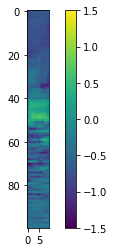

date:180330, rec:008, time:6305.0, label:0.0


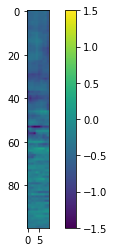

date:180327, rec:008, time:3372.0, label:0.0


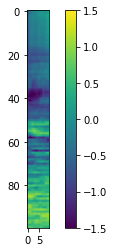

date:180325, rec:009, time:500.0, label:0.0


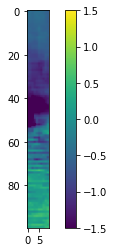

date:180330, rec:009, time:6961.0, label:0.0


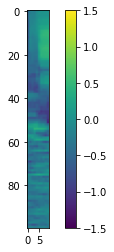

date:180327, rec:007, time:2550.0, label:0.0


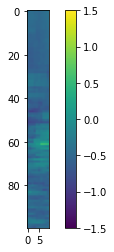

date:180327, rec:004, time:810.0, label:1.0
date:180330, rec:008, time:2216.0, label:0.0


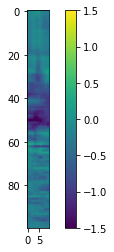

date:180410, rec:002, time:7140.0, label:1.0
date:180410, rec:005, time:5637.0, label:1.0
date:180327, rec:005, time:2790.0, label:1.0
date:180327, rec:005, time:3350.0, label:1.0
date:180325, rec:006, time:3373.0, label:1.0
date:180324, rec:003, time:5037.0, label:1.0
date:180331, rec:001, time:6520.0, label:0.0


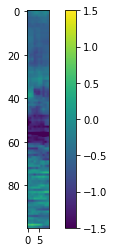

date:180324, rec:001, time:3965.0, label:0.0


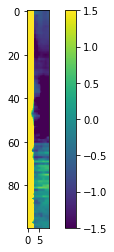

date:180331, rec:004, time:6037.0, label:1.0
date:180327, rec:007, time:3940.0, label:0.0


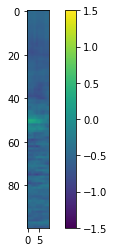

date:180330, rec:008, time:6035.0, label:0.0


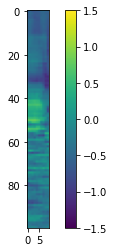

date:180324, rec:001, time:560.0, label:0.0


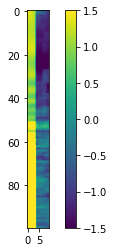

date:180330, rec:008, time:301.0, label:0.0


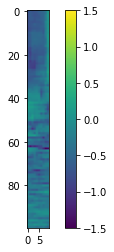

date:180327, rec:007, time:6791.0, label:0.0


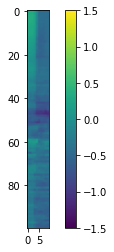

date:180330, rec:009, time:6471.0, label:0.0


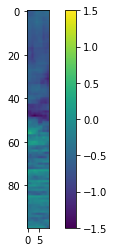

date:180329, rec:001, time:420.0, label:0.0


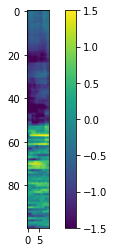

date:180329, rec:004, time:6071.0, label:1.0
date:180331, rec:001, time:2240.0, label:0.0


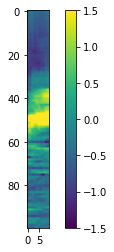

date:180329, rec:005, time:2075.0, label:1.0
date:180325, rec:009, time:940.0, label:0.0


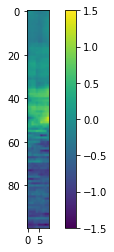

date:180322, rec:007, time:4820.0, label:0.0


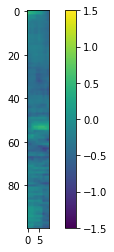

date:180324, rec:008, time:793.0, label:1.0
date:180324, rec:001, time:3655.0, label:1.0
date:180327, rec:001, time:280.0, label:0.0


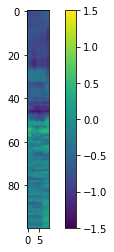

date:180330, rec:009, time:5481.0, label:0.0


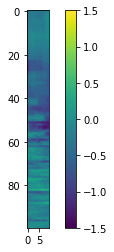

date:180322, rec:003, time:4737.0, label:1.0
date:180325, rec:002, time:3537.0, label:1.0
date:180410, rec:002, time:1507.0, label:1.0
date:180401, rec:001, time:1030.0, label:0.0


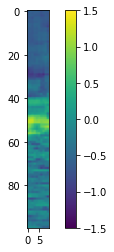

date:180324, rec:006, time:912.0, label:1.0
date:180327, rec:002, time:5844.0, label:1.0
date:180331, rec:004, time:3845.0, label:1.0
date:180323, rec:002, time:4089.0, label:1.0
date:180325, rec:007, time:2063.0, label:1.0
date:180330, rec:001, time:2482.0, label:1.0
date:180331, rec:001, time:4525.0, label:1.0
date:180327, rec:007, time:6871.0, label:0.0


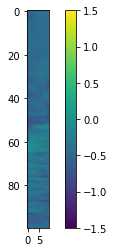

date:180324, rec:001, time:7007.0, label:1.0
date:180331, rec:005, time:2787.0, label:1.0
date:180324, rec:008, time:1381.0, label:0.0


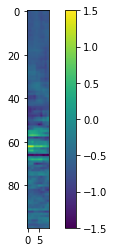

date:180325, rec:003, time:6707.0, label:1.0
date:180330, rec:009, time:60.0, label:1.0
date:180410, rec:005, time:3419.0, label:1.0
date:180325, rec:009, time:880.0, label:0.0


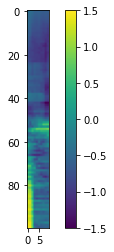

date:180401, rec:001, time:5207.0, label:0.0


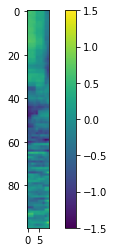

date:180327, rec:007, time:1290.0, label:0.0


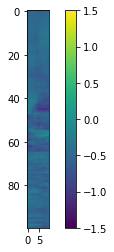

date:180325, rec:005, time:5347.0, label:1.0
date:180323, rec:003, time:5551.0, label:1.0
date:180327, rec:008, time:4483.0, label:0.0


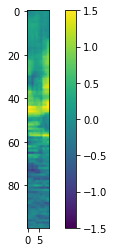

date:180325, rec:002, time:6548.0, label:1.0
date:180327, rec:007, time:1940.0, label:0.0


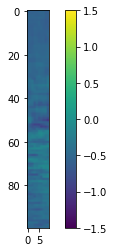

date:180325, rec:009, time:900.0, label:0.0


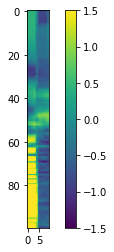

date:180330, rec:008, time:7005.0, label:0.0


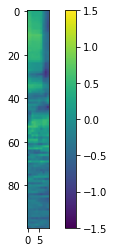

date:180327, rec:008, time:5653.0, label:0.0


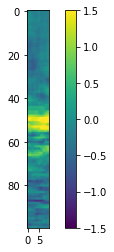

date:180322, rec:007, time:3349.0, label:0.0


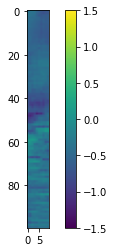

date:180325, rec:006, time:5951.0, label:1.0


In [13]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

### Logistic regression with no regularization

In [14]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
CH = 23
timewindow = 10

model = GLM(input_dim=100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5501317381858826
Val loss for epoch 0: 0.578952431678772
Train loss for epoch 1: 0.5312055349349976
Val loss for epoch 1: 0.5460025072097778
1
Train loss for epoch 2: 0.5229501128196716
Val loss for epoch 2: 0.5375192165374756
2
Train loss for epoch 3: 0.5189002752304077
Val loss for epoch 3: 0.5547788143157959
Train loss for epoch 4: 0.5138167142868042
Val loss for epoch 4: 0.5203583240509033
4
Train loss for epoch 5: 0.511466920375824
Val loss for epoch 5: 0.5168392062187195
5
Train loss for epoch 6: 0.5104483962059021
Val loss for epoch 6: 0.48341962695121765
6
Train loss for epoch 7: 0.5102124214172363
Val loss for epoch 7: 0.4487179219722748
7
Train loss for epoch 8: 0.5081571936607361
Val loss for epoch 8: 0.47916731238365173
Train loss for epoch 9: 0.5063937306404114
Val loss for epoch 9: 0.5084479451179504
Train loss for epoch 10: 0.5066790580749512
Val loss for epoch 10: 0.4916720688343048
Train loss for epoch 11: 0.5059410929679871
Val loss for epoch

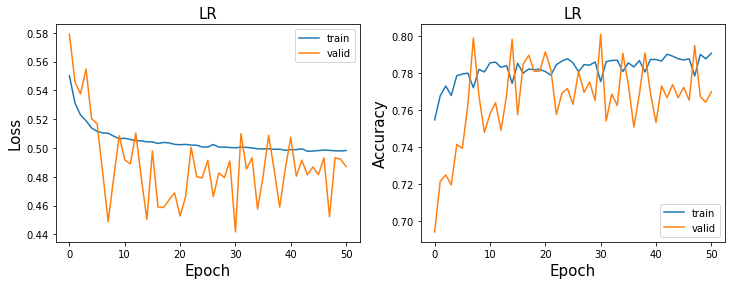

In [17]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) 

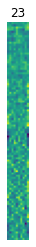

In [18]:
model = GLM(input_dim=100*10).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [19]:
## Calculate accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))


test loss:0.5163707137107849 accuracy:0.7455167916530812


In [20]:
np.mean(np.concatenate(test_labels))

0.74029994

In [21]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_0, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

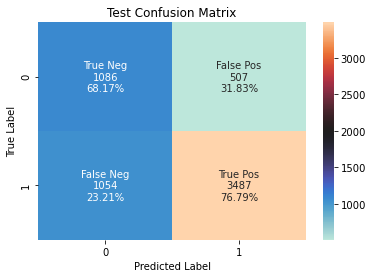

In [24]:
## Confusion matrix
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180411, rec:003, time:6138.0, label:1.0
Original data 62 CH


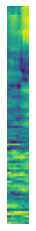

In [27]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][2], cases_wrong_0[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_0[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### Logistic regression with L2 regularization

In [32]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
CH = 23

model = GLM(100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [33]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5500103831291199
Val loss for epoch 0: 0.5546365976333618
Train loss for epoch 1: 0.5305765867233276
Val loss for epoch 1: 0.5647781491279602
Train loss for epoch 2: 0.522956132888794
Val loss for epoch 2: 0.5186289548873901
2
Train loss for epoch 3: 0.5180632472038269
Val loss for epoch 3: 0.5159234404563904
3
Train loss for epoch 4: 0.5137943029403687
Val loss for epoch 4: 0.47386154532432556
4
Train loss for epoch 5: 0.5140202641487122
Val loss for epoch 5: 0.4817233681678772
Train loss for epoch 6: 0.5119082927703857
Val loss for epoch 6: 0.4667523503303528
6
Train loss for epoch 7: 0.5088551640510559
Val loss for epoch 7: 0.5022341012954712
Train loss for epoch 8: 0.5078617334365845
Val loss for epoch 8: 0.4875521957874298
Train loss for epoch 9: 0.5069258213043213
Val loss for epoch 9: 0.5128065347671509
Train loss for epoch 10: 0.5065723657608032
Val loss for epoch 10: 0.4482841491699219
10
Train loss for epoch 11: 0.5067765712738037
Val loss for epoch 

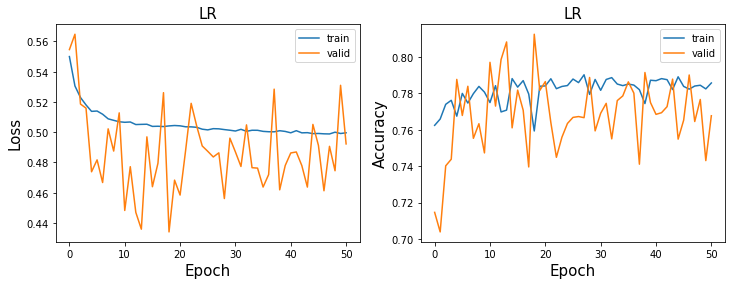

In [34]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # reduction = 'sum', Goose_1st_2

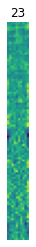

In [35]:
model = GLM(input_dim=100*10).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [40]:
## Calculate accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))


test loss:0.5146456956863403 accuracy:0.7481252037821976


In [41]:
np.mean(np.concatenate(test_labels))

0.74029994

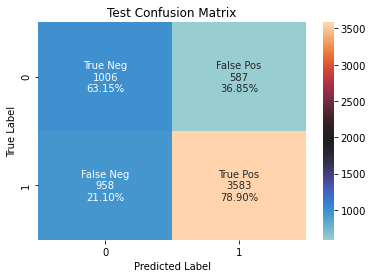

In [42]:
## Confusion matrix
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180411, rec:003, time:6138.0, label:1.0
Original data 62 CH


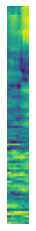

In [45]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_1[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### Logistic Regression with finite difference regularization

In [48]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
CH = 23

model = GLM(100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

In [ ]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [ ]:
model = GLM(input_dim=100*10).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [ ]:
## Calculate accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))


In [ ]:
np.mean(np.concatenate(test_labels))

In [ ]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_2, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

In [ ]:
## Confusion matrix
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

In [ ]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_2[0][0], cases_wrong_2[0][1], cases_wrong_2[0][2], cases_wrong_2[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_2[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM without regularization

In [22]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [13]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6105479598045349
Val loss for epoch 0: 1.2834664583206177
Train loss for epoch 1: 0.5602447986602783
Val loss for epoch 1: 0.9178999662399292
1
Train loss for epoch 2: 0.4674215018749237
Val loss for epoch 2: 3.1678149700164795
Train loss for epoch 3: 0.5240594744682312
Val loss for epoch 3: 0.9516066312789917
Train loss for epoch 4: 0.4172993004322052
Val loss for epoch 4: 1.5819454193115234
Train loss for epoch 5: 0.4704030156135559
Val loss for epoch 5: 1.1257431507110596
Train loss for epoch 6: 0.3469279408454895
Val loss for epoch 6: 1.4243940114974976
Train loss for epoch 7: 0.3866455554962158
Val loss for epoch 7: 1.1779205799102783
Train loss for epoch 8: 0.33019065856933594
Val loss for epoch 8: 1.365188479423523
Train loss for epoch 9: 0.3815663754940033
Val loss for epoch 9: 1.5121104717254639
Train loss for epoch 10: 0.40764206647872925
Val loss for epoch 10: 1.7473173141479492
Train loss for epoch 11: 0.3409585654735565
Val loss for epoch 11: 1.27

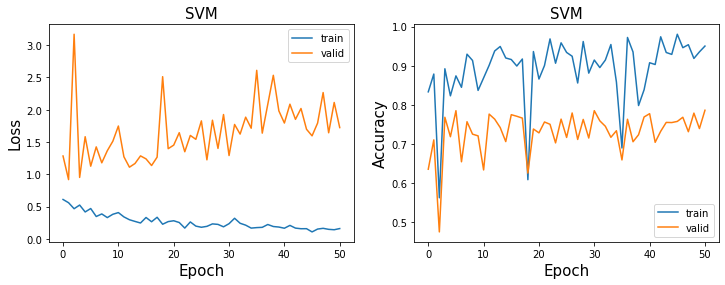

In [14]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [23]:
best_epoch = 1

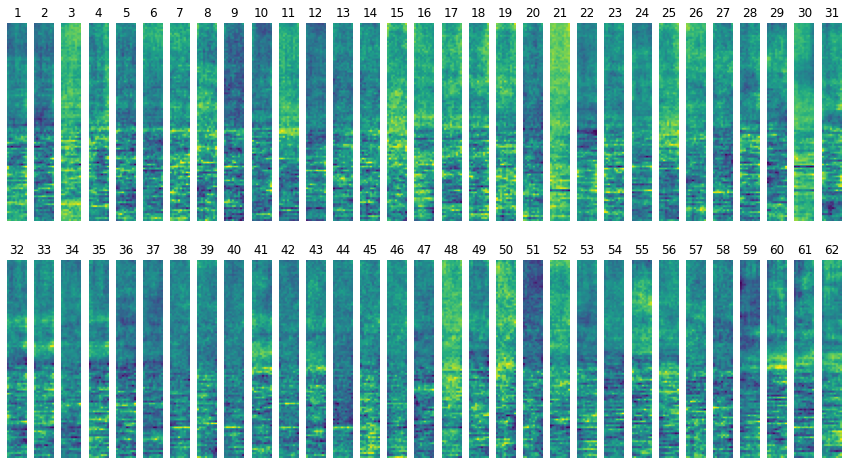

In [24]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [27]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7428555488586426 accuracy:0.7838461538461539


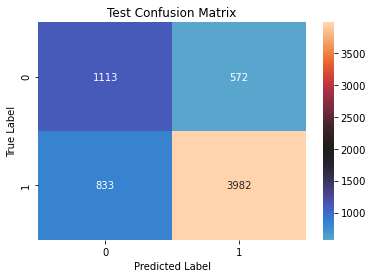

In [28]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


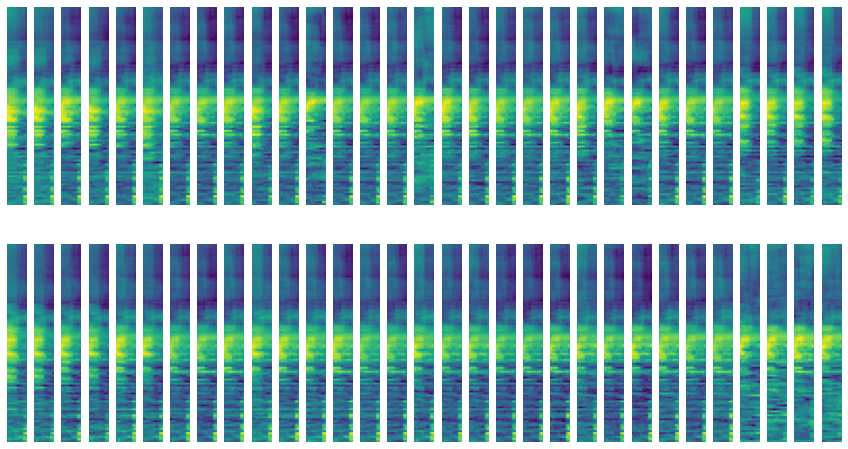

In [30]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_3[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

In [31]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.142331600189209
Val loss for epoch 0: 2.375016927719116
Train loss for epoch 1: 0.8872479200363159
Val loss for epoch 1: 0.9689788222312927
1
Train loss for epoch 2: 0.9464882612228394
Val loss for epoch 2: 1.0704563856124878
Train loss for epoch 3: 0.8319297432899475
Val loss for epoch 3: 1.3819953203201294
Train loss for epoch 4: 0.9815953969955444
Val loss for epoch 4: 2.2135136127471924
Train loss for epoch 5: 0.9559652209281921
Val loss for epoch 5: 1.3571209907531738
Train loss for epoch 6: 0.9480046629905701
Val loss for epoch 6: 0.958657443523407
6
Train loss for epoch 7: 0.8747104406356812
Val loss for epoch 7: 1.0527974367141724
Train loss for epoch 8: 0.938942551612854
Val loss for epoch 8: 1.816292405128479
Train loss for epoch 9: 1.033324956893921
Val loss for epoch 9: 1.2031350135803223
Train loss for epoch 10: 0.908989667892456
Val loss for epoch 10: 0.6989802718162537
10
Train loss for epoch 11: 0.9314482808113098
Val loss for epoch 11: 1.08010

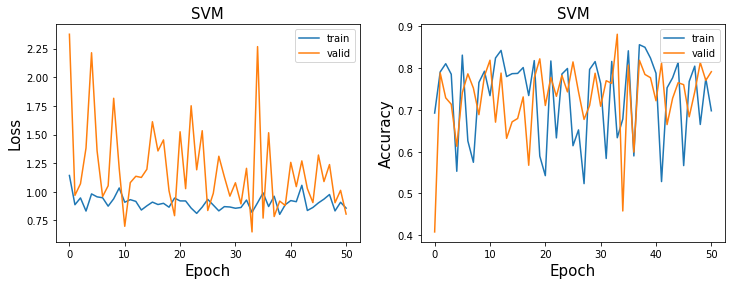

In [17]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [32]:
best_epoch = 33

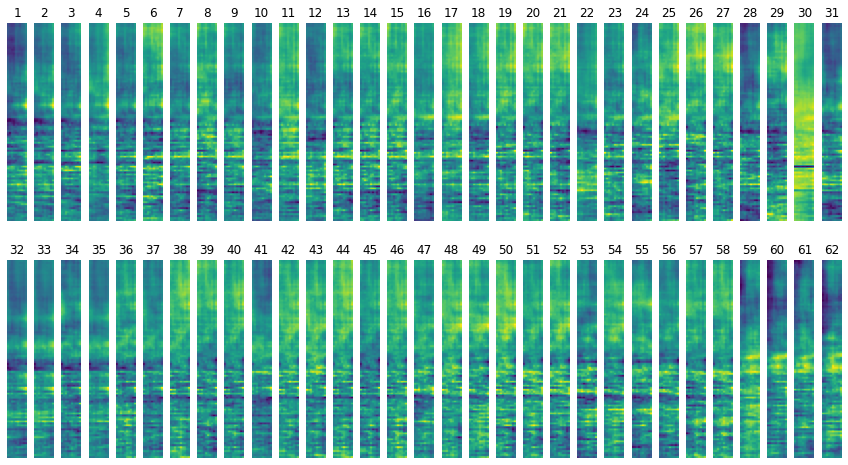

In [33]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [34]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:1.2684636116027832 accuracy:0.7512307692307693


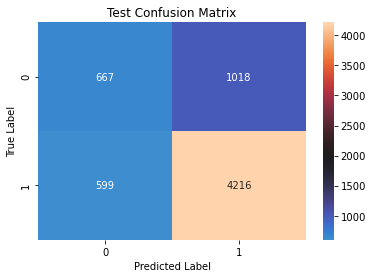

In [35]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


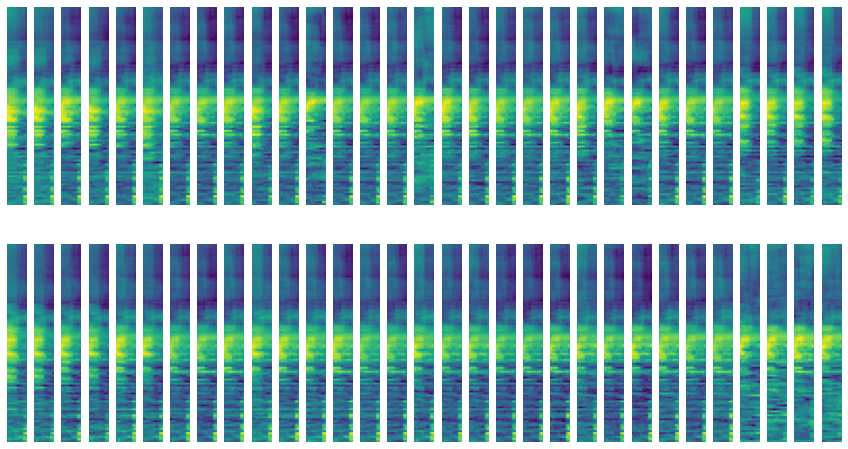

In [36]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_4[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [37]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.1333791017532349
Val loss for epoch 0: 1.699452519416809
Train loss for epoch 1: 0.7799455523490906
Val loss for epoch 1: 1.1568527221679688
1
Train loss for epoch 2: 0.8088831305503845
Val loss for epoch 2: 1.5023279190063477
Train loss for epoch 3: 0.7681555151939392
Val loss for epoch 3: 1.125550389289856
3
Train loss for epoch 4: 0.779151201248169
Val loss for epoch 4: 0.9314382076263428
4
Train loss for epoch 5: 0.6864786744117737
Val loss for epoch 5: 1.0832509994506836
Train loss for epoch 6: 0.6971858739852905
Val loss for epoch 6: 1.0215011835098267
Train loss for epoch 7: 0.7639809250831604
Val loss for epoch 7: 1.7163935899734497
Train loss for epoch 8: 0.7523619532585144
Val loss for epoch 8: 1.3559271097183228
Train loss for epoch 9: 0.837641179561615
Val loss for epoch 9: 1.0237863063812256
Train loss for epoch 10: 0.7160231471061707
Val loss for epoch 10: 1.128845453262329
Train loss for epoch 11: 0.7040753364562988
Val loss for epoch 11: 3.2867

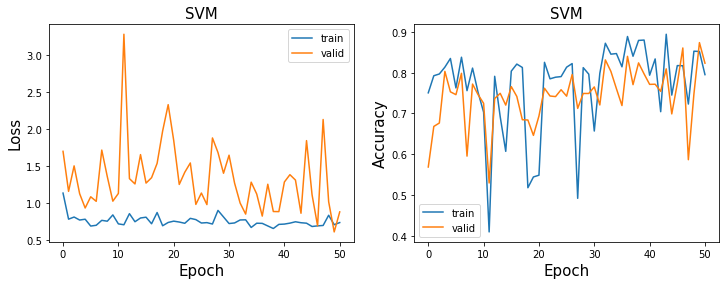

In [20]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [38]:
best_epoch = 49

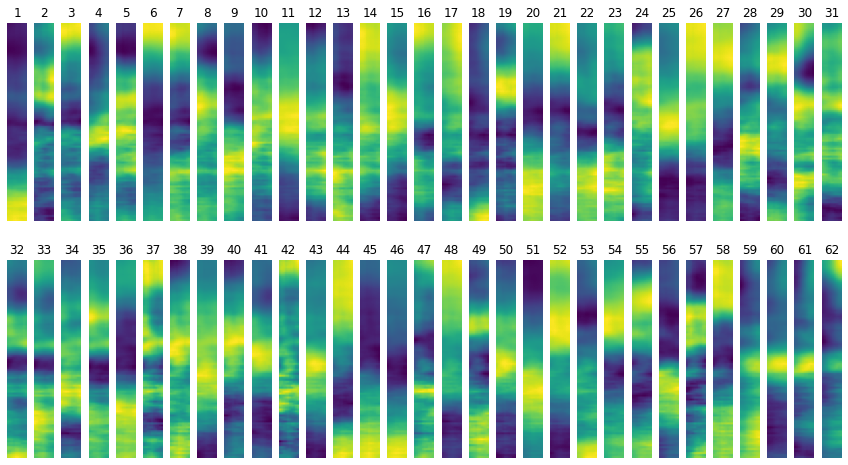

In [39]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [40]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8956817984580994 accuracy:0.8355384615384616


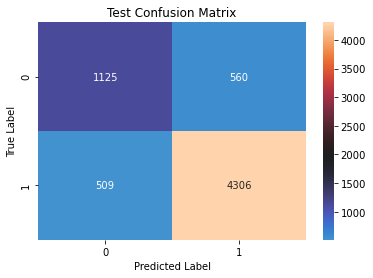

In [41]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


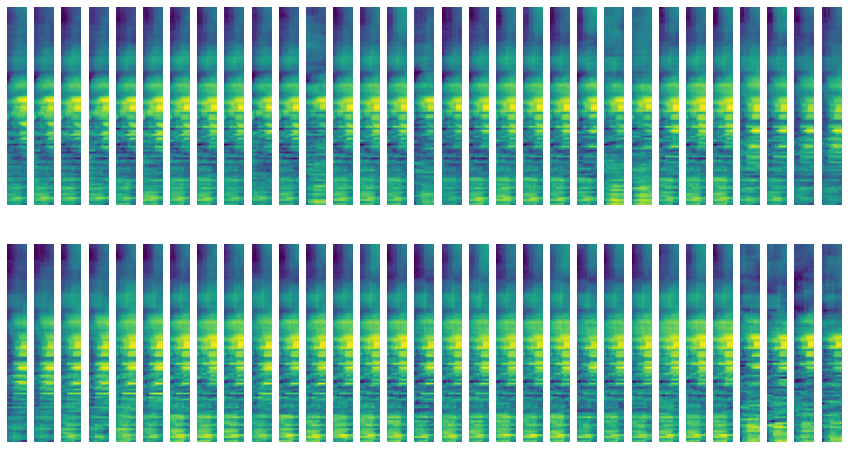

In [42]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_5[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()